In [1]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_plot(epoch):
    global rec_A_pos_click_cnt, rec_A_neg_click_cnt, rec_B_pos_click_cnt, rec_B_neg_click_cnt, rec_C_pos_click_cnt, rec_C_neg_click_cnt
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(0, 1, 100)
    ax.plot(x, beta.pdf(x, rec_A_pos_click_cnt, rec_A_neg_click_cnt), 'r', alpha = 0.6, label = 'rec A')
    ax.plot(x, beta.pdf(x, rec_B_pos_click_cnt, rec_B_neg_click_cnt), 'b', alpha = 0.6, label = 'rec B')
    ax.plot(x, beta.pdf(x, rec_C_pos_click_cnt, rec_C_neg_click_cnt), 'g', alpha = 0.6, label = 'rec C')
    
    plt.legend()
    plt.title(f'epoch : {epoch}')
    plt.show()

In [3]:
def thompson_sampling():
    global rec_A_pos_click_cnt, rec_A_neg_click_cnt, rec_B_pos_click_cnt, rec_B_neg_click_cnt, rec_C_pos_click_cnt, rec_C_neg_click_cnt, rec_A, rec_B, rec_C
    # 베타 분포에서 값 샘플링
    A_sampling = beta.rvs(rec_A_pos_click_cnt, rec_A_neg_click_cnt)
    
    B_sampling = beta.rvs(rec_B_pos_click_cnt, rec_B_neg_click_cnt)
    
    C_sampling = beta.rvs(rec_C_pos_click_cnt, rec_C_neg_click_cnt)
    
    # 가장 값이 높은 추천을 선택
    idx = np.argmax([A_sampling, B_sampling, C_sampling])
    
    # 해당 추천의 클릭 확률에 따라서 클릭, 비클릭 여부 수정
    if idx == 0:
        if np.random.rand(1)[0] <= rec_A:
            rec_A_pos_click_cnt += 1
        else:
            rec_A_neg_click_cnt += 1
    elif idx == 1:
        if np.random.rand(1)[0] <= rec_B:
            rec_B_pos_click_cnt += 1
        else:
            rec_B_neg_click_cnt += 1
    else:
        if np.random.rand(1)[0] <= rec_C:
            rec_C_pos_click_cnt += 1
        else:
            rec_C_neg_click_cnt += 1

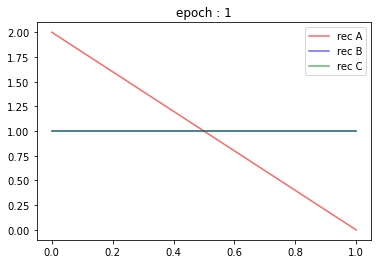

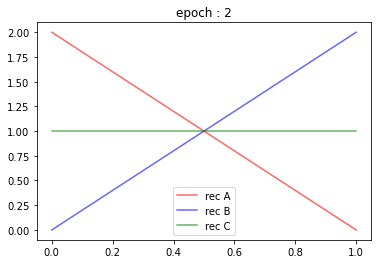

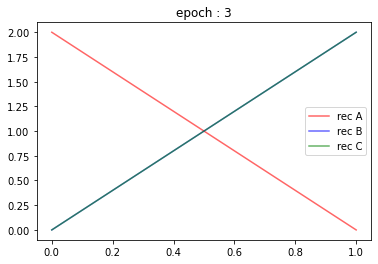

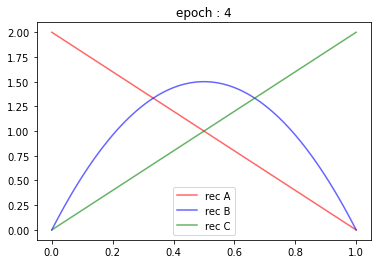

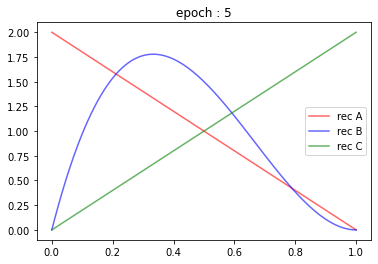

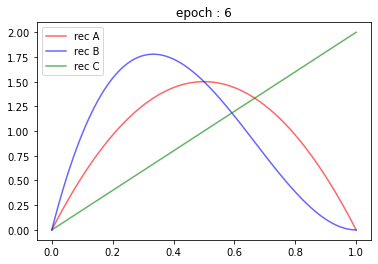

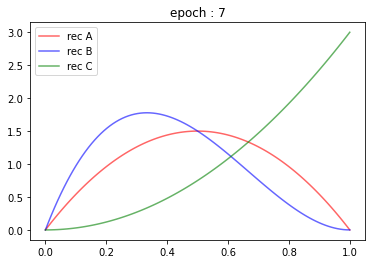

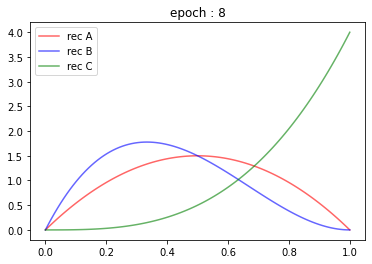

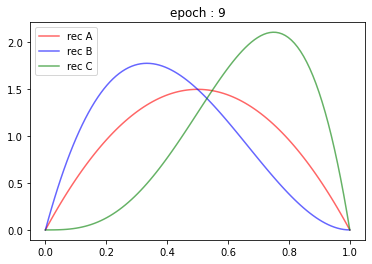

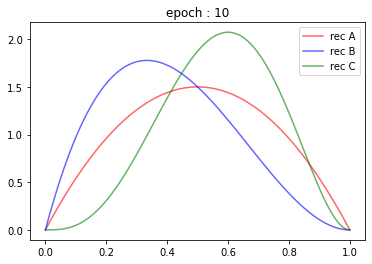

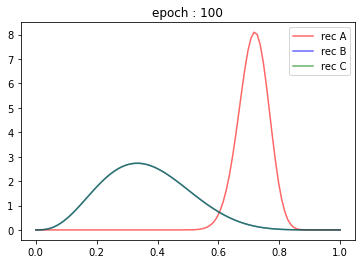

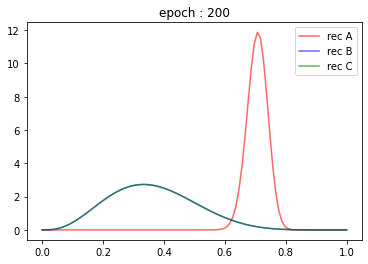

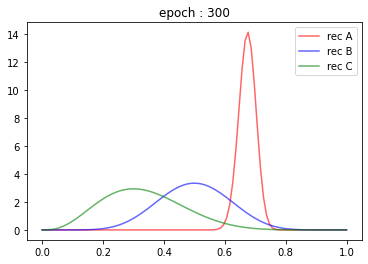

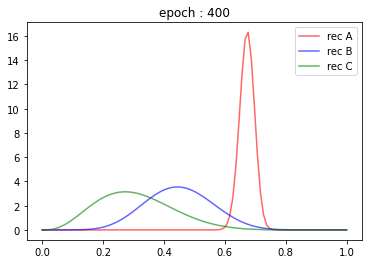

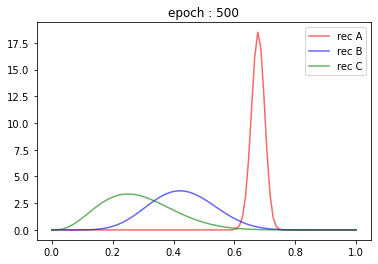

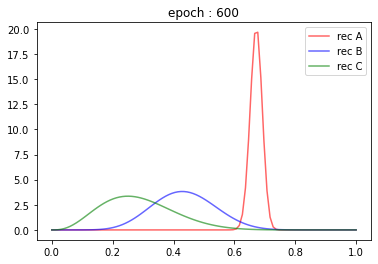

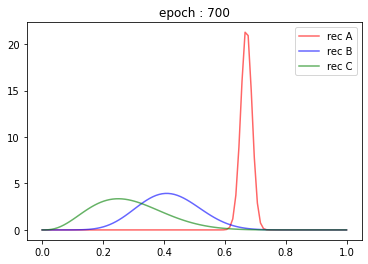

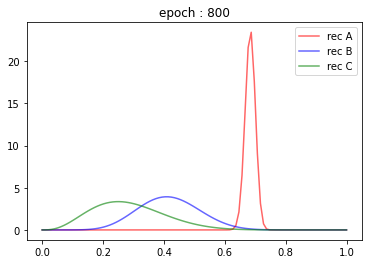

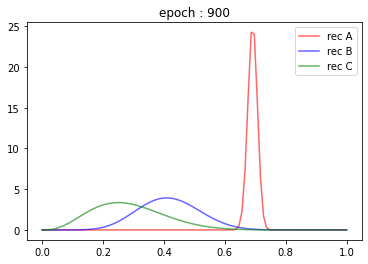

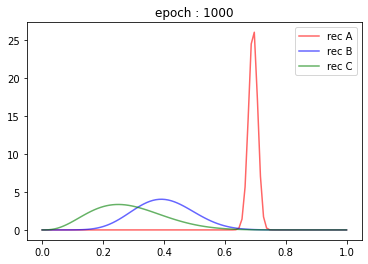

In [38]:
#### 베타 분포 초기 변수 값 (beta 분포의 경우 1로 초기화 해여함)
rec_A_pos_click_cnt = 1 # A 추천의 클릭 횟수
rec_A_neg_click_cnt = 1 # A 추천의 비클릭 횟수

rec_B_pos_click_cnt = 1 # B 추천의 클릭 횟수
rec_B_neg_click_cnt = 1 # B 추천의 비클릭 횟수

rec_C_pos_click_cnt = 1 # C 추천의 클릭 횟수
rec_C_neg_click_cnt = 1 # C 추천의 비클릭 횟수

# 각 추천에 클릭 확률을 임의로 설정
rec_A = 0.7
rec_B = 0.5
rec_C = 0.3

epochs = 1000
for epoch in range(1, epochs + 1):
    thompson_sampling()
    if epoch in [i for i in range(1, 11)]:
        show_plot(epoch)
    if epoch % 100 == 0:
        show_plot(epoch)

In [39]:
A_sampling = beta.rvs(rec_A_pos_click_cnt, rec_A_neg_click_cnt)    
B_sampling = beta.rvs(rec_B_pos_click_cnt, rec_B_neg_click_cnt)
C_sampling = beta.rvs(rec_C_pos_click_cnt, rec_C_neg_click_cnt)

print(f'A_sampling : {A_sampling}')
print(f'B_sampling : {B_sampling}')
print(f'C_sampling : {C_sampling}')

A_sampling : 0.691379378636857
B_sampling : 0.3948430247733323
C_sampling : 0.3986834606202602


A > B > C 순으로 제일 큰 값이 선택됭 분포가 다르다는 것을 알 수 있음

분포 상으로 A 분포가 제일 큰 값이 제일 자주 선택될 것이고, B가 2번째, C가 마지막임
